# Titanic - Visual EDA with Insights 

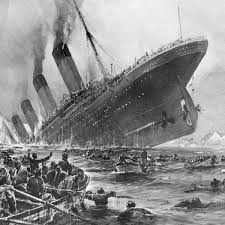
RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States.

### Feature Description

#### Objective:
1. Undertanding the dataset and data creaning.
2. find the insight and visualazation.
3. build the clasification models.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings("ignore")

sns.set(color_codes = True)   
sns.set_palette(palette = 'mako_r', n_colors = 8)

### Loading the dataset

In [2]:
### seaborn titinic dataset load
df = sns.load_dataset("titanic")
df.head() # Read the dataset and taking a look at the first 5 rows of the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
## drop the unwanted column
df.drop(["embark_town","class"],axis=1,inplace=True)

In [4]:
## check the duplicated
df.duplicated().sum()

107

In [5]:
## remove the duplicates
df = df.drop_duplicates()
df.shape

(784, 13)

In [6]:
 ## after the removing duplicates
df.duplicated().sum()

0

In [7]:
## check the null values
df.isna().sum()

survived        0
pclass          0
sex             0
age           106
sibsp           0
parch           0
fare            0
embarked        2
who             0
adult_male      0
deck          582
alive           0
alone           0
dtype: int64

<AxesSubplot:>

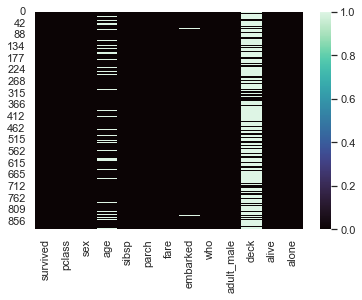

In [8]:
## visulation heatmap find the null values
sns.heatmap(df.isna(),cmap="mako")

In [9]:
## checking dtypes details wise
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   age         678 non-null    float64 
 4   sibsp       784 non-null    int64   
 5   parch       784 non-null    int64   
 6   fare        784 non-null    float64 
 7   embarked    782 non-null    object  
 8   who         784 non-null    object  
 9   adult_male  784 non-null    bool    
 10  deck        202 non-null    category
 11  alive       784 non-null    object  
 12  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 70.0+ KB


### Getting the statistical summary of dataset

In [10]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.759076,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
## checking the columns name
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'alive', 'alone'],
      dtype='object')

### Visualizing the correlations between numerical variables

Text(0.5, 1.0, 'Correlations Between Variables')

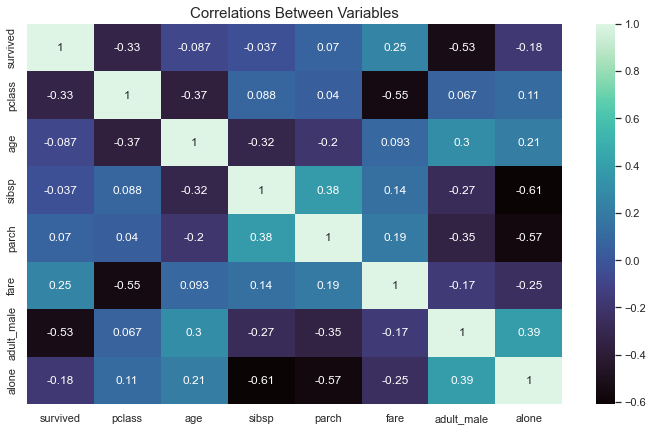

In [12]:
## correlation values variance
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap="mako")
plt.title("Correlations Between Variables",size=15)

### observation:
1. Insight, the correlation is. The positive correlation shows is 0.02 to 0.1.
2. Insight, the correlation is. The negative correlation. It ranges from -0.02 to -0.06.

In [13]:
## find the only numbric columns header names 
num_col = df.corr().columns
num_col

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone'],
      dtype='object')

In [14]:
## remove the numberic columns and find the category columns
cate_co = df.drop(columns=['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'])

In [15]:
## categrical columns
cate_co.head()

,sex,embarked,who,adult_male,deck,alive,alone
0,male,S,man,True,NaN,no,False
1,female,C,woman,False,C,yes,False
2,female,S,woman,False,NaN,yes,True
3,female,S,woman,False,C,yes,False
4,male,S,man,True,NaN,no,True


In [16]:
## numberical columns
num_col = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]
num_col.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


# Visualization caterical columns

In [17]:
cate_co.head(2)

,sex,embarked,who,adult_male,deck,alive,alone
0,male,S,man,True,NaN,no,False
1,female,C,woman,False,C,yes,False


male      491
female    293
Name: sex, dtype: int64
------------------------
S    568
C    155
Q     59
Name: embarked, dtype: int64
----------------------------
man      451
woman    251
child     82
Name: who, dtype: int64


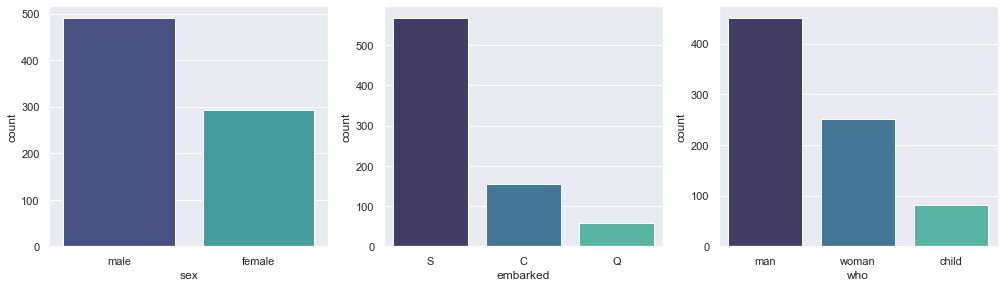

In [18]:
### Using the matplotlib and seaborn visualization plots, subplot and countplots and find insight.
plt.figure(figsize=(17,15))
plt.subplot(3,3,1)
sns.countplot(cate_co["sex"],palette="mako")
plt.subplot(3,3,2)
sns.countplot(cate_co["embarked"],palette="mako")
plt.subplot(3,3,3)
sns.countplot(cate_co["who"],palette="mako")


print(cate_co.sex.value_counts())
print("--"*12)
print(cate_co.embarked.value_counts())
print("--"*14)
print(cate_co["who"].value_counts())

### observation:
1. Insight the sex column: more then 60% of the people are male 491 and female 293.
2. Insight the embarked column: More than 70% of the people boarded from Southampton 568.
3. Insight the who column: more then 45% of the people are male 451 and female 251 including childs 82.

C    59
B    46
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
------------------------------
True     451
False    333
Name: adult_male, dtype: int64
------------------------------
True     446
False    338
Name: alone, dtype: int64


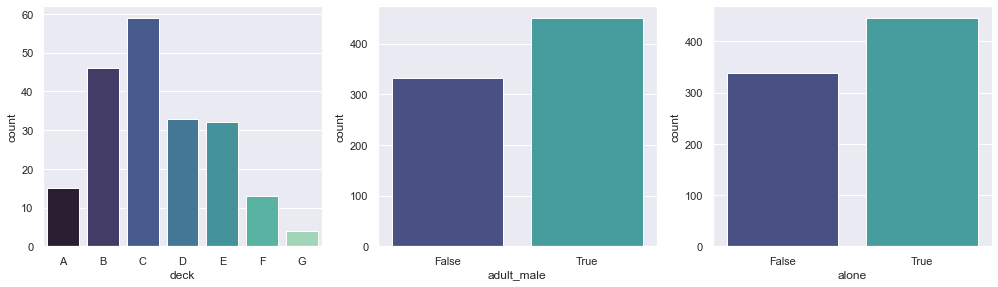

In [19]:
### Using the matplotlib and seaborn visualization plots, subplot and countplots and find insight.
plt.figure(figsize=(17,15))
plt.subplot(3,3,1)
sns.countplot(cate_co["deck"],palette="mako")
plt.subplot(3,3,2)
sns.countplot(cate_co["adult_male"],palette="mako")
plt.subplot(3,3,3)
sns.countplot(cate_co["alone"],palette="mako")



print(cate_co["deck"].value_counts())
print("--"*15)
print(cate_co["adult_male"].value_counts())
print("--"*15)
print(cate_co["alone"].value_counts())

### observation:
1. Insight of the deck column: most of the highst people are B and C deck.
2. Insight of the adult_male column: most of the people are adult around 451 in passenger list. 
3. Insight of the alone column: most of the people are alone around 446 in passenger list.

## Visualization numrical columns

In [20]:
num_col.head(2)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


0    461
1    323
Name: survived, dtype: int64
----------------------------
3    405
1    214
2    165
Name: pclass, dtype: int64
----------------------------
0    517
1    201
2     27
4     18
3     14
5      5
8      2
Name: sibsp, dtype: int64
----------------------------
0    580
1    114
2     75
5      5
3      5
4      4
6      1
Name: parch, dtype: int64


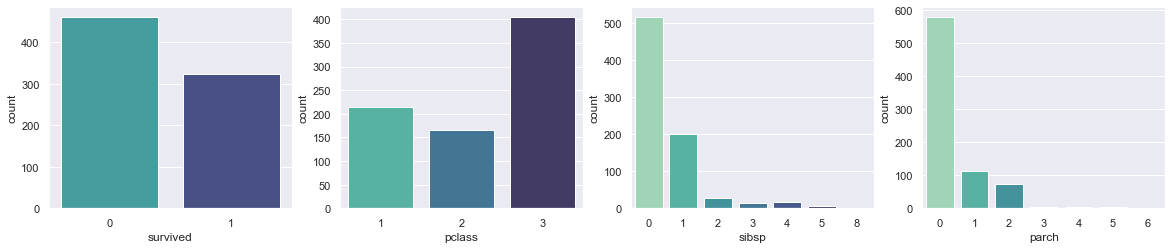

In [21]:
### Using the matplotlib and seaborn visualization plots, subplot and countplots and find insight.
plt.figure(figsize=(20,17))
plt.subplot(4,4,1)
sns.countplot(num_col["survived"],palette="mako_r")
plt.subplot(4,4,2)
sns.countplot(num_col["pclass"],palette="mako_r")
plt.subplot(4,4,3)
sns.countplot(num_col["sibsp"],palette="mako_r")
plt.subplot(4,4,4)
sns.countplot(num_col["parch"],palette="mako_r")



print(num_col["survived"].value_counts())
print("--"*14)
print(num_col["pclass"].value_counts())
print("--"*14)
print(num_col["sibsp"].value_counts())
print("--"*14)
print(num_col["parch"].value_counts())



### observation:¶
1. Insight of the survived column: more then 70% people are not surivived.
2. Insight of the pclass column: most of the passengers staying in class 3 around 405.
3. Insight of the sibsp column: passanger of the list no any family relation with the passanger arornd number of pepole are 517.
4. Insight of the parch column: passanger of the list family relation with the passanger arornd number of pepole are 204.

24.00    29
18.00    25
22.00    24
19.00    23
28.00    22
         ..
36.50     1
0.92      1
23.50     1
55.50     1
74.00     1
Name: age, Length: 88, dtype: int64
------------------------------------
13.0000    32
26.0000    30
8.0500     25
10.5000    23
7.7500     21
           ..
28.5000     1
6.2375      1
14.0000     1
9.4750      1
10.5167     1
Name: fare, Length: 248, dtype: int64


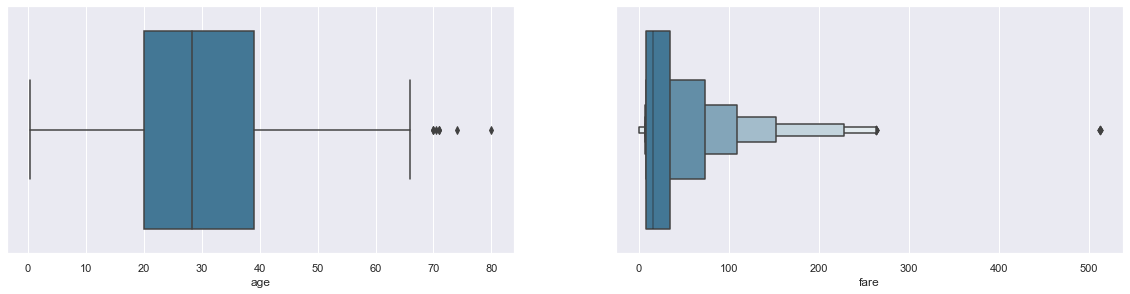

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(num_col["age"],palette="mako")
plt.subplot(2,2,2)
sns.boxenplot(num_col["fare"],palette="mako")

print(num_col["age"].value_counts())
print("--"*18)
print(num_col["fare"].value_counts())

### observation:¶
1. Insight of the age column: people came in the passanger list age 20 t0 40.
2. Insight of the pclass column: most of the passengers paid the ticket prices are 10 to 26.

## Find the insight for how many peoples are servived in the dataset

survived  sex   
0         male      385
          female     76
1         female    217
          male      106
dtype: int64
Male 27.53 Female 74.06
------------------------
survived  embarked
0         S           357
          C            65
          Q            39
1         S           211
          C            90
          Q            20
dtype: int64
S 59.66 C 58.06 Q 33.9
------------------------
survived  who  
0         man      366
          woman     61
          child     34
1         woman    190
          man       85
          child     48
dtype: int64
Man 23.22 Woman 75.7 child 58.54
----------------------------


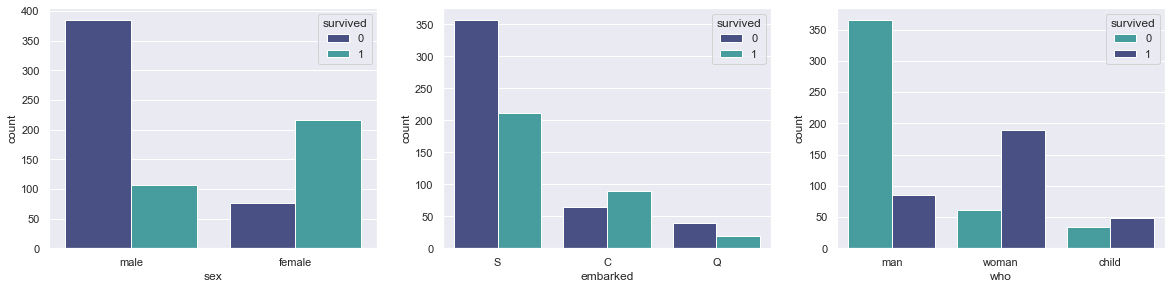

In [23]:
### Using the matplotlib and seaborn visualization plots, subplot and countplots and find insight.
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.countplot(cate_co["sex"],hue=df["survived"],palette="mako")
plt.subplot(3,3,2)
sns.countplot(cate_co["embarked"],hue=df["survived"],palette="mako")
plt.subplot(3,3,3)
sns.countplot(cate_co["who"],hue=df["survived"],palette="mako_r")



print(df[["sex"]].groupby(df["survived"]).value_counts())
print("Male",round(106/385*100,2),"Female",round(217/293*100,2))
print("--"*12)
print(df[["embarked"]].groupby(df["survived"]).value_counts())
print("S",round(213/357*100,2),"C",round(90/(90+65)*100,2),"Q",round(20/(39+20)*100,2))
print("--"*12)
print(df[["who"]].groupby(df["survived"]).value_counts())
print("Man",round(85/366*100,2),"Woman",round(190/(61+190)*100,2),"child",round(48/(48+34)*100,2))
print("--"*14)

## observation:
1. Insight of the sex column: more then female ares 74% survived compare to male 27% survived.
2. Insight of the embarked column: area wise s ares 59% survived and c are 58% survived Q are 33% survived.
3. Insight of the who column: most of the woman 75% and man are 23% and cild are 58% survived.

survived  deck
0         C       24
          B       12
          A        8
          D        8
          E        8
          F        5
          G        2
1         C       35
          B       34
          D       25
          E       24
          F        8
          A        7
          G        2
dtype: int64
survived  adult_male
0         True          366
          False          95
1         False         238
          True           85
dtype: int64
survived  alone
0         True     296
          False    165
1         False    173
          True     150
dtype: int64


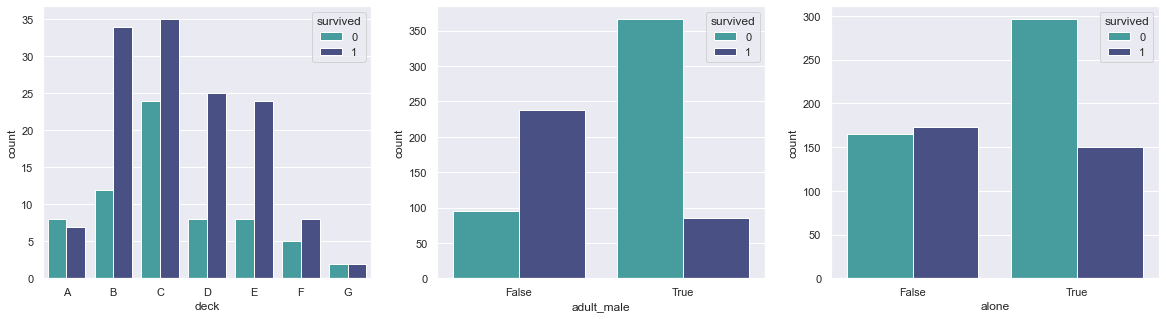

In [24]:
### Using the matplotlib and seaborn visualization plots, subplot and countplots and find insight.
plt.figure(figsize=(20,17))
plt.subplot(3,3,1)
sns.countplot(cate_co["deck"],hue=df["survived"],palette="mako_r")
plt.subplot(3,3,2)
sns.countplot(cate_co["adult_male"],hue=df["survived"],palette="mako_r")
plt.subplot(3,3,3)
sns.countplot(cate_co["alone"],hue=df["survived"],palette="mako_r")


print(df[["deck"]].groupby(df["survived"]).value_counts())
print(df[["adult_male"]].groupby(df["survived"]).value_counts())
print(df[["alone"]].groupby(df["survived"]).value_counts())

## observation:
1. Insight of the deck column: most of the passanger survived are B to E blocks.
2. Insight of the adult column: most of the adult passanger 65% not survived.
3. Insight of the alone column: most of the alone passanger 50% survived.

survived  pclass
0         3         301
          2          81
          1          79
1         1         135
          3         104
          2          84
dtype: int64
------------------------
survived  sibsp
0         0        320
          1         94
          2         15
          4         15
          3         10
          5          5
          8          2
1         0        197
          1        107
          2         12
          3          4
          4          3
dtype: int64
------------------------
survived  parch
0         0        364
          1         51
          2         35
          4          4
          5          4
          3          2
          6          1
1         0        216
          1         63
          2         40
          3          3
          5          1
dtype: int64


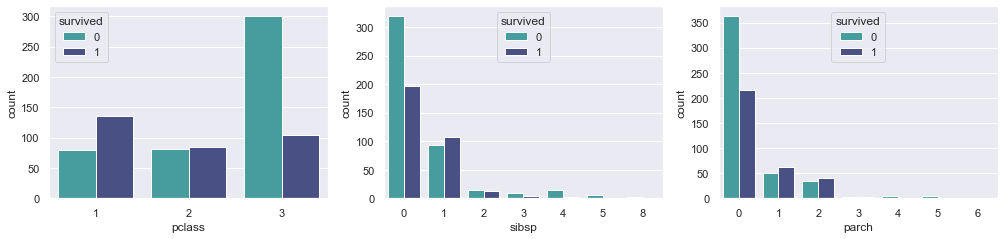

In [25]:
plt.figure(figsize=(17,12))
plt.subplot(3,3,1)
sns.countplot(num_col["pclass"],hue=df["survived"],palette="mako_r")
plt.subplot(3,3,2)
sns.countplot(num_col["sibsp"],hue=df["survived"],palette="mako_r")
plt.subplot(3,3,3)
sns.countplot(num_col["parch"],hue=df["survived"],palette="mako_r")


print(df[["pclass"]].groupby(df["survived"]).value_counts())
print("--"*12)
print(df[["sibsp"]].groupby(df["survived"]).value_counts())
print("--"*12)
print(df[["parch"]].groupby(df["survived"]).value_counts())

### observation:
1. Insight of the Pclass column: passanger class3 66% pepole not survived.
2. Insight of the sibsp column: passanger of the non family member are not survived around 320.


survived  age  
0         21.00    17
          28.00    16
          18.00    16
          24.00    15
          25.00    14
                   ..
1         0.67      1
          0.75      1
          0.92      1
          7.00      1
          80.00     1
Length: 142, dtype: int64

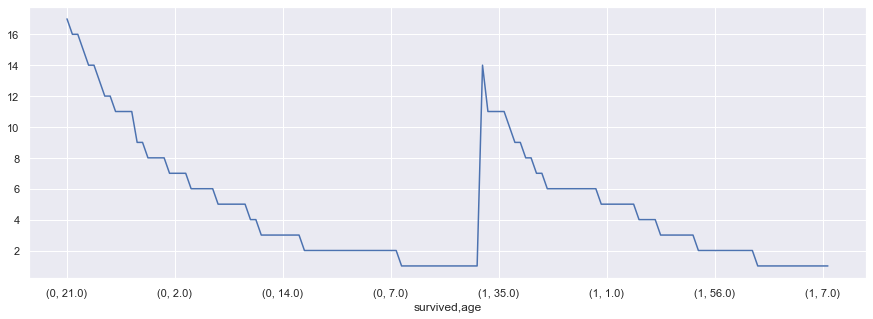

In [26]:
df[["age"]].groupby(df["survived"]).value_counts().plot(color="b",figsize=(15,5))
df[["age"]].groupby(df["survived"]).value_counts()

## observation:
1. Insight of the age column: most of the passanger of the age wise survived 35 year old and not survived age 28 year olds.

## Missing values heandling:

1. option is dropna
2. option set the (mean,meadin,mode)

In [27]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,no,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,yes,False


In [28]:
df.isna().sum()

survived        0
pclass          0
sex             0
age           106
sibsp           0
parch           0
fare            0
embarked        2
who             0
adult_male      0
deck          582
alive           0
alone           0
dtype: int64

In [29]:
## healdeling the missing values
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"]= df["embarked"].fillna(df["embarked"].mode()[0])


In [30]:
## drop the dexk colums 582 missing values the very big emfet the model then delete the column
df.drop(columns='deck',axis=1,inplace=True)

In [31]:
## after the fillnull values 
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

### Preprossasing data

In [32]:
## copy the dataset from new df
df_new = df.copy()
df_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,no,True


In [33]:
## convert the categarical data to numberic data using get dummies from pandas liabires convert the 0 to 1 
df_new = pd.get_dummies(df_new,drop_first=1)
df_new

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman,alive_yes
0,0,3,22.00,1,0,7.2500,True,False,1,0,1,1,0,0
1,1,1,38.00,1,0,71.2833,False,False,0,0,0,0,1,1
2,1,3,26.00,0,0,7.9250,False,True,0,0,1,0,1,1
3,1,1,35.00,1,0,53.1000,False,False,0,0,1,0,1,1
4,0,3,35.00,0,0,8.0500,True,True,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0,5,29.1250,False,False,0,1,0,0,1,0
887,1,1,19.00,0,0,30.0000,False,True,0,0,1,0,1,1
888,0,3,28.25,1,2,23.4500,False,False,0,0,1,0,1,0
889,1,1,26.00,0,0,30.0000,True,True,1,0,0,1,0,1


In [34]:
## change the columns dtype 
df_new["alone"] =df_new["alone"].astype(str)
df_new["adult_male"] =df_new["alone"].astype(str)
df_new["age"] =df_new["age"].astype(int)

In [35]:
## values of caount find the paticalur anlone column
df_new["alone"].value_counts()

True     446
False    338
Name: alone, dtype: int64

In [36]:
## values of caount find the paticalur adult_male column
df_new["adult_male"].value_counts()

True     446
False    338
Name: adult_male, dtype: int64

In [37]:
### replace the catagarical data with numberic second option if ypu convert the values type
df_new["adult_male"] = df_new["adult_male"].replace({"True":1,"False":2})
df_new["alone"] = df_new["alone"].replace({"True":1,"False":2})

In [38]:
## after the convert the categarical to values 
df_new

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman,alive_yes
0,0,3,22,1,0,7.2500,2,2,1,0,1,1,0,0
1,1,1,38,1,0,71.2833,2,2,0,0,0,0,1,1
2,1,3,26,0,0,7.9250,1,1,0,0,1,0,1,1
3,1,1,35,1,0,53.1000,2,2,0,0,1,0,1,1
4,0,3,35,0,0,8.0500,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39,0,5,29.1250,2,2,0,1,0,0,1,0
887,1,1,19,0,0,30.0000,1,1,0,0,1,0,1,1
888,0,3,28,1,2,23.4500,2,2,0,0,1,0,1,0
889,1,1,26,0,0,30.0000,1,1,1,0,0,1,0,1


## Feature Scaling
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization or standardization. Feature scaling is generally performed during the data pre-processing stage, before training models using machine learning algorithms.

In [39]:
a = ["age","fare"]
a

['age', 'fare']

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
min_scaler = MinMaxScaler()
df_new[a] = min_scaler.fit_transform(df_new[a])

In [42]:
df_new.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,who_man,who_woman,alive_yes
0,0,3,0.2750,1,0,0.014151,2,2,1,0,1,1,0,0
1,1,1,0.4750,1,0,0.139136,2,2,0,0,0,0,1,1
2,1,3,0.3250,0,0,0.015469,1,1,0,0,1,0,1,1
3,1,1,0.4375,1,0,0.103644,2,2,0,0,1,0,1,1
4,0,3,0.4375,0,0,0.015713,1,1,1,0,1,1,0,0


## Feature selection

Text(0.5, 1.0, 'Correlations Between Variables')

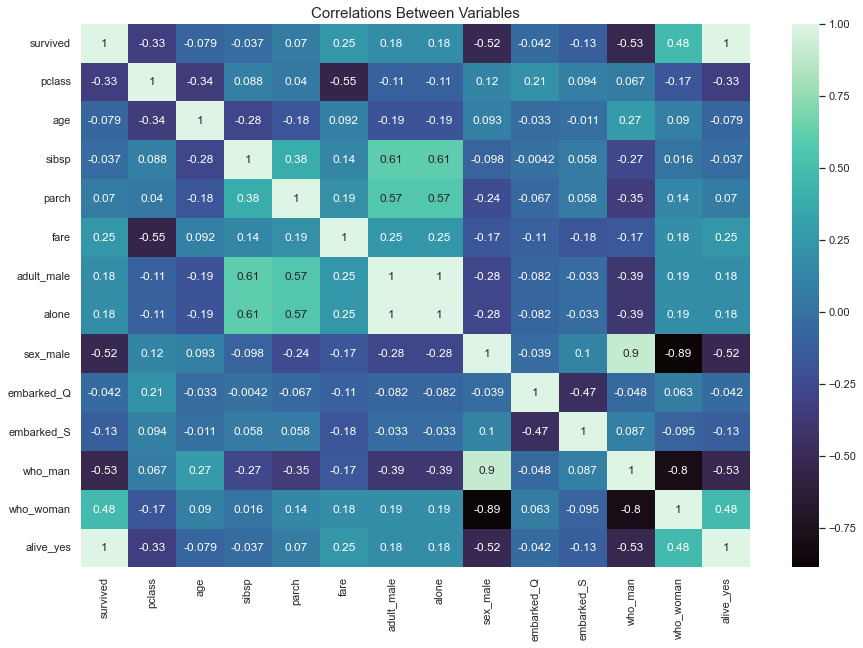

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True,cmap="mako")
plt.title("Correlations Between Variables",size=15)

In [44]:
## correlation with survived column check and remove the -50 effected columns delete fist option 
df_new.corr()["survived"].sort_values(ascending=False)

survived      1.000000
alive_yes     1.000000
who_woman     0.480988
fare          0.246769
adult_male    0.176595
alone         0.176595
parch         0.070307
sibsp        -0.036589
embarked_Q   -0.042314
age          -0.078785
embarked_S   -0.127016
pclass       -0.332658
sex_male     -0.515772
who_man      -0.528502
Name: survived, dtype: float64

In [45]:
## correlation with survived column check and remove the -50 effected columns delete second option 
df_new.corr()[df_new.corr()["survived"]>-0.50].index

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'embarked_Q', 'embarked_S', 'who_woman', 'alive_yes'],
      dtype='object')

In [46]:
## redy to model prossing 
df_model = df_new[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'embarked_Q', 'embarked_S',
       'who_woman',
       'alive_yes']]
df_model.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,embarked_Q,embarked_S,who_woman,alive_yes
0,0,3,0.2750,1,0,0.014151,2,2,0,1,0,0
1,1,1,0.4750,1,0,0.139136,2,2,0,0,1,1
2,1,3,0.3250,0,0,0.015469,1,1,0,1,1,1
3,1,1,0.4375,1,0,0.103644,2,2,0,1,1,1
4,0,3,0.4375,0,0,0.015713,1,1,0,1,0,0


# x and y split the dataset 

In [47]:
x = df_model.iloc[:,1:]
y = df_model["survived"]

# Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=43)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(627, 11)
(157, 11)
(627,)
(157,)


# Machine learning model building
A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

## Logistic Regression

In statistics, the logistic model is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression is estimating the parameters of a logistic model.

In [49]:
## # Import the sklearn necessary libraries
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)
y_predtrain = log_model.predict(x_train)


## # Import the sklearn necessary metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score,f1_score

### test dataset metrict scores
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred))
print("recall_score:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy_score: 1.0
confusion_matrix: [[88  0]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        69

    accuracy                           1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157

precision_score: 1.0
recall_score: 1.0
f1_score: 1.0


In [50]:
### train dataset metrict scores
print("accuracy_score:",accuracy_score(y_train,y_predtrain))
print("confusion_matrix:",confusion_matrix(y_train,y_predtrain))
print(classification_report(y_train,y_predtrain))
print("precision_score:",precision_score(y_train,y_predtrain))
print("recall_score:",recall_score(y_train,y_predtrain))
print("f1_score:",f1_score(y_train,y_predtrain))

accuracy_score: 1.0
confusion_matrix: [[373   0]
 [  0 254]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       254

    accuracy                           1.00       627
   macro avg       1.00      1.00      1.00       627
weighted avg       1.00      1.00      1.00       627

precision_score: 1.0
recall_score: 1.0
f1_score: 1.0


# KNeighborsClassifier
KNeighborsClassifier implements classification based on voting by nearest k-neighbors of target point, t, while RadiusNeighborsClassifier implements classification based on all neighborhood points within a fixed radius, r, of target point, t.

In [51]:
## # Import the sklearn necessary libraries
from sklearn.neighbors import KNeighborsClassifier
log_model = KNeighborsClassifier(n_neighbors=22)
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)
y_predtrain = log_model.predict(x_train)


## # Import the sklearn necessary metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score,f1_score

print("accuracy_score:",accuracy_score(y_test,y_pred))
print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred))
print("recall_score:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy_score: 0.9808917197452229
confusion_matrix: [[87  1]
 [ 2 67]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.99      0.97      0.98        69

    accuracy                           0.98       157
   macro avg       0.98      0.98      0.98       157
weighted avg       0.98      0.98      0.98       157

precision_score: 0.9852941176470589
recall_score: 0.9710144927536232
f1_score: 0.9781021897810219


In [52]:
### train dataset metrict scores
print("accuracy_score:",accuracy_score(y_train,y_predtrain))
print("confusion_matrix:",confusion_matrix(y_train,y_predtrain))
print(classification_report(y_train,y_predtrain))
print("precision_score:",precision_score(y_train,y_predtrain))
print("recall_score:",recall_score(y_train,y_predtrain))
print("f1_score:",f1_score(y_train,y_predtrain))

accuracy_score: 0.9856459330143541
confusion_matrix: [[373   0]
 [  9 245]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       373
           1       1.00      0.96      0.98       254

    accuracy                           0.99       627
   macro avg       0.99      0.98      0.99       627
weighted avg       0.99      0.99      0.99       627

precision_score: 1.0
recall_score: 0.9645669291338582
f1_score: 0.9819639278557113


## Predicted values to actual values Error diff

In [53]:
err_rate = []

for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    err_rate.append(np.mean(pred_i != y_test))

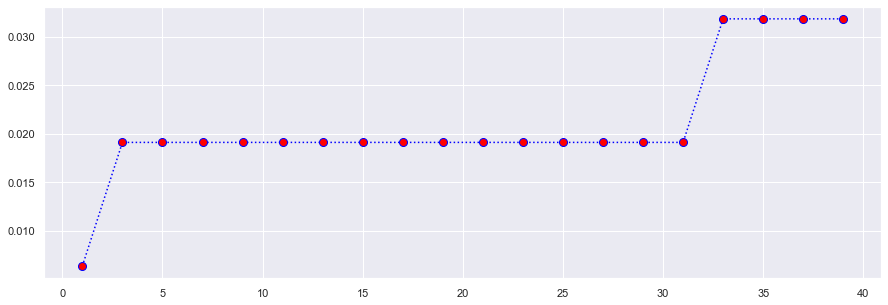

In [54]:
plt.figure(figsize=(15,5))
plt.plot(range(1,40,2),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
plt.show()

## GridSearchCV

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered.

In [55]:
para = {"n_neighbors":np.arange(1,50)}
para

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [56]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid_cv = GridSearchCV(knn,para,cv=5)
grid_cv.fit(x,y)

print("best_score_",grid_cv.best_score_)
print("best_params_",grid_cv.best_params_)

best_score_ 0.9885350318471338
best_params_ {'n_neighbors': 13}


In [57]:
print("Train data",grid_cv.score(x_train,y_train))
print("Test_data",grid_cv.score(x_test,y_test))

Train data 0.9920255183413078
Test_data 0.9808917197452229
